In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [42]:
import numpy as np
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout,Conv2D,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization


In [3]:
FAST_RUN=False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH,IMAGE_HEIGHT)

In [4]:
import zipfile

Zip_Files=['test1','train']

for Zip_File in Zip_Files:
    with zipfile.ZipFile(f"../input/dogs-vs-cats/{Zip_File}.zip") as z:
        z.extractall(".")
        print(f'{Zip_File} UnZipped')



test1 UnZipped
train UnZipped


In [5]:
import zipfile

path="/kaggle/input/dogs-vs-cats"

for zip_file in os.listdir(path)[:2]:
    zipfile.ZipFile(f"{path}/{zip_file}",'r').extractall('.')
    print(f"{zip_file} unzipped")

test1.zip unzipped
train.zip unzipped


In [6]:
import os
train_images=os.listdir('/kaggle/working/train')
CATEGORIES=[]

for image_name in train_images:
    class_name=image_name.split('.')[0]
    CATEGORIES.append(0 if class_name == 'cat' else 1 )
    
df=pd.DataFrame({"train_images" : train_images ,"CATEGORIES" : CATEGORIES})

In [7]:
df.head

<bound method NDFrame.head of         train_images  CATEGORIES
0       dog.5826.jpg           1
1      dog.12418.jpg           1
2       dog.3835.jpg           1
3       dog.6240.jpg           1
4      dog.10632.jpg           1
...              ...         ...
24995   dog.8860.jpg           1
24996   cat.7829.jpg           0
24997   cat.3578.jpg           0
24998   dog.3464.jpg           1
24999   dog.8758.jpg           1

[25000 rows x 2 columns]>

In [8]:
df.tail()

train_images  CATEGORIES
24995  dog.8860.jpg           1
24996  cat.7829.jpg           0
24997  cat.3578.jpg           0
24998  dog.3464.jpg           1
24999  dog.8758.jpg           1

In [9]:
df.describe()

CATEGORIES
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000

In [10]:
df["CATEGORIES"].value_counts()

CATEGORIES
1    12500
0    12500
Name: count, dtype: int64

<Axes: xlabel='CATEGORIES'>

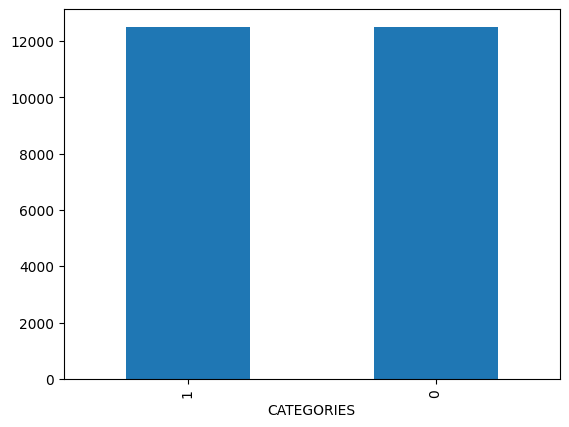

In [11]:
df["CATEGORIES"].value_counts().plot.bar()

In [12]:
shapes=[]

for image in df['train_images']:
    path=os.path.join('/kaggle/working/train',image)
    image_array=plt.imread(path)
    shapes.append(image_array.shape)

print(pd.Series(shapes).value_counts())

idx=np.argmin(shapes)
print(f"\n The Minimum Dimension is ==> {shapes[idx]}\n")

    

(374, 500, 3)    2955
(375, 499, 3)    2912
(499, 375, 3)     261
(333, 499, 3)     229
(500, 374, 3)     227
                 ... 
(276, 358, 3)       1
(214, 153, 3)       1
(109, 139, 3)       1
(468, 419, 3)       1
(200, 340, 3)       1
Name: count, Length: 8513, dtype: int64

 The Minimum Dimension is ==> (427, 500, 3)



<class 'PIL.JpegImagePlugin.JpegImageFile'>


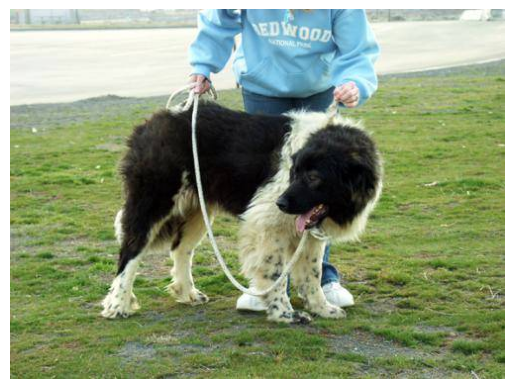

In [13]:
sample = rnd.choice(train_images)
image = load_img(os.path.join("/kaggle/working/train", sample))
print(type(image))
plt.imshow(image)
plt.axis("off")
plt.show()

In [15]:
df['CATEGORIES']=df['CATEGORIES'].replace({1:'dog',0:'cat'})

In [21]:
train_df,valid_df=train_test_split(df,test_size=0.20,random_state=42)
train_df=train_df.reset_index(drop=True)
valid_df=valid_df.reset_index(drop=True)

In [24]:
train_df['CATEGORIES'].value_counts()

CATEGORIES
dog    10028
cat     9972
Name: count, dtype: int64

<Axes: xlabel='CATEGORIES'>

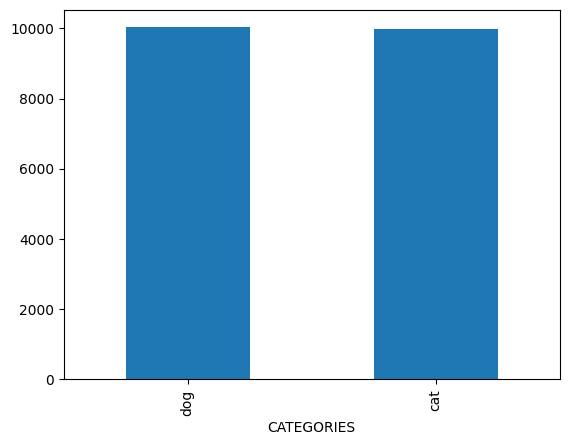

In [26]:
train_df['CATEGORIES'].value_counts().plot.bar()

In [31]:
valid_df['CATEGORIES'].value_counts()

CATEGORIES
cat    2528
dog    2472
Name: count, dtype: int64

<Axes: xlabel='CATEGORIES'>

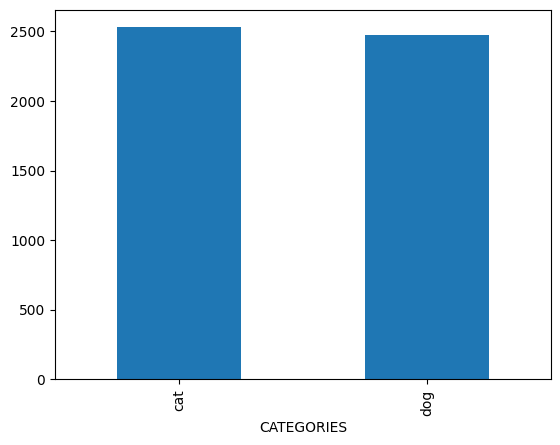

In [32]:
valid_df['CATEGORIES'].value_counts().plot.bar()

In [33]:
total_train=train_df.shape[0]
total_validate=valid_df.shape[0]
batch_size=15

In [34]:
df.head()

train_images CATEGORIES
0   dog.5826.jpg        dog
1  dog.12418.jpg        dog
2   dog.3835.jpg        dog
3   dog.6240.jpg        dog
4  dog.10632.jpg        dog

In [35]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/kaggle/working/train", 
    x_col='train_images',
    y_col='CATEGORIES',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [36]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_dataframe(
    valid_df, 
    "/kaggle/working/train", 
    x_col='train_images',
    y_col='CATEGORIES',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [37]:
example_df = train_df.sample(n=1) # take 1 image-sample
print(example_df, "\n")

example_df= example_df.reset_index(drop=True)
print(example_df, "\n")

example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/kaggle/working/train", 
    x_col='train_images',
    y_col='CATEGORIES',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

       train_images CATEGORIES
15206  cat.3675.jpg        cat 

   train_images CATEGORIES
0  cat.3675.jpg        cat 

Found 1 validated image filenames belonging to 1 classes.


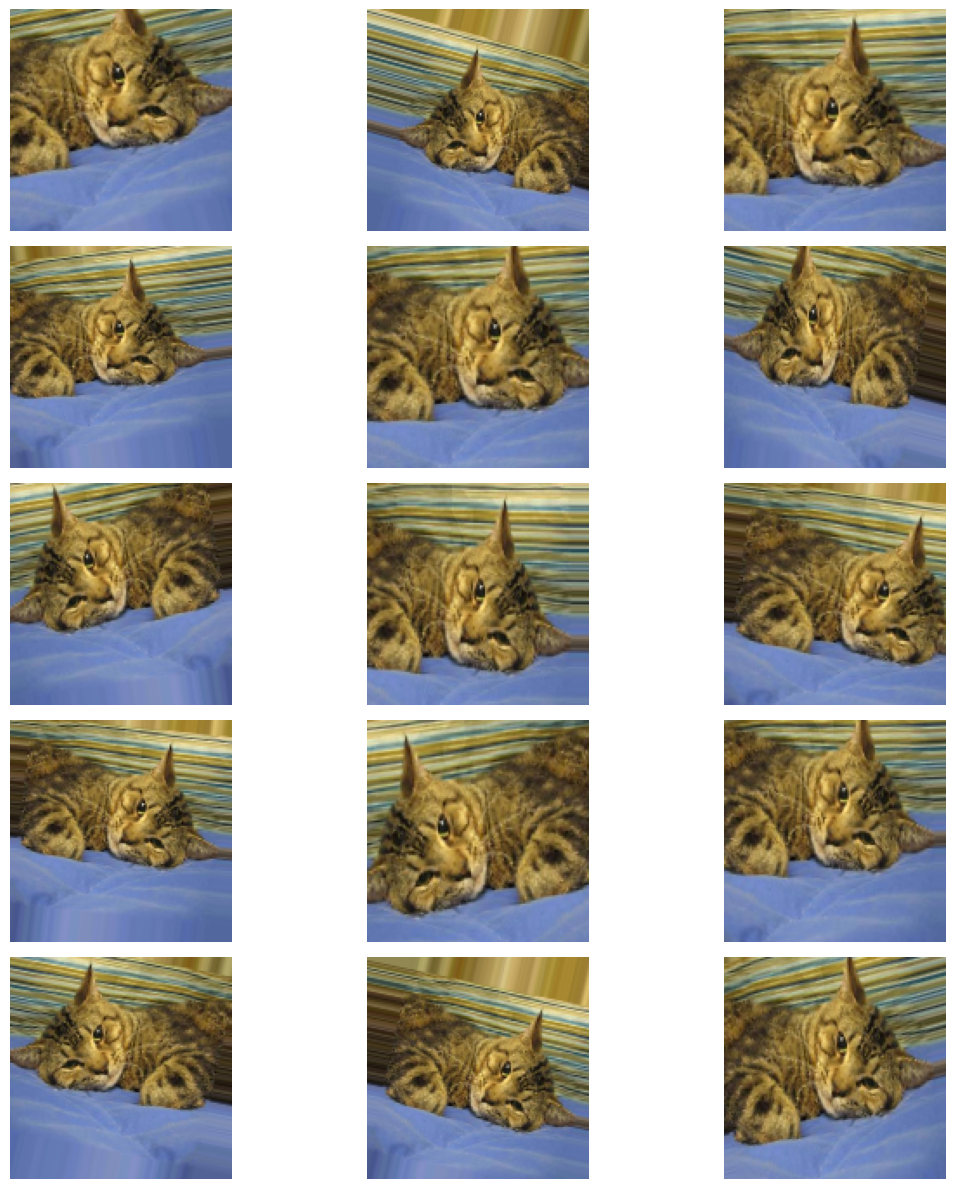

In [38]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

In [43]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
#     BatchNormalization(),
    MaxPool2D(pool_size=(4,4)),
    Dropout(rate=0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(4,4)),
    Dropout(rate=0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(4,4)),
    Dropout(rate=0.25),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(rate=0.5),

    Dense(2, activation='softmax') # 2 because we have cat and dog classes

])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,090 (629.26 KB)

 Trainable params: 160,706 (627.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [44]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [45]:
earlystop = EarlyStopping(patience=5)

In [46]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [47]:
epochs = 3 if FAST_RUN else 10

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=valid_generator,
#                     validation_steps=total_validate//batch_size, # 5000//15  = 333
#                     steps_per_epoch=total_train//batch_size,     # 20000//15 = 1333
                    callbacks=callbacks)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 132s 97ms/step - accuracy: 0.5399 - loss: 0.8207 - val_accuracy: 0.5352 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 2/10


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 129s 97ms/step - accuracy: 0.5873 - loss: 0.6835 - val_accuracy: 0.5414 - val_loss: 0.7054 - learning_rate: 0.0010
Epoch 3/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 128s 96ms/step - accuracy: 0.6466 - loss: 0.6322 - val_accuracy: 0.7226 - val_loss: 0.5523 - learning_rate: 0.0010
Epoch 4/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 127s 95ms/step - accuracy: 0.6711 - loss: 0.6076 - val_accuracy: 0.6398 - val_loss: 0.6758 - learning_rate: 0.0010
Epoch 5/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 128s 96ms/step - accuracy: 0.7044 - loss: 0.5821 - val_accuracy: 0.7674 - val_loss: 0.4813 - learning_rate: 0.0010
Epoch 6/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 126s 94ms/step - accuracy: 0.7323 - loss: 0.5447 - val_accuracy: 0.7630 - val_loss: 0.4881 - learning_rate: 0.0010
Epoch 7/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 125s 94ms/step - accuracy: 0.7410 - loss: 0.5266 - val_accuracy: 0.7034 - val_loss: 0.5757 - learning_rate: 0.0010
Epoch 8/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 129s 96ms/step - accuracy: 

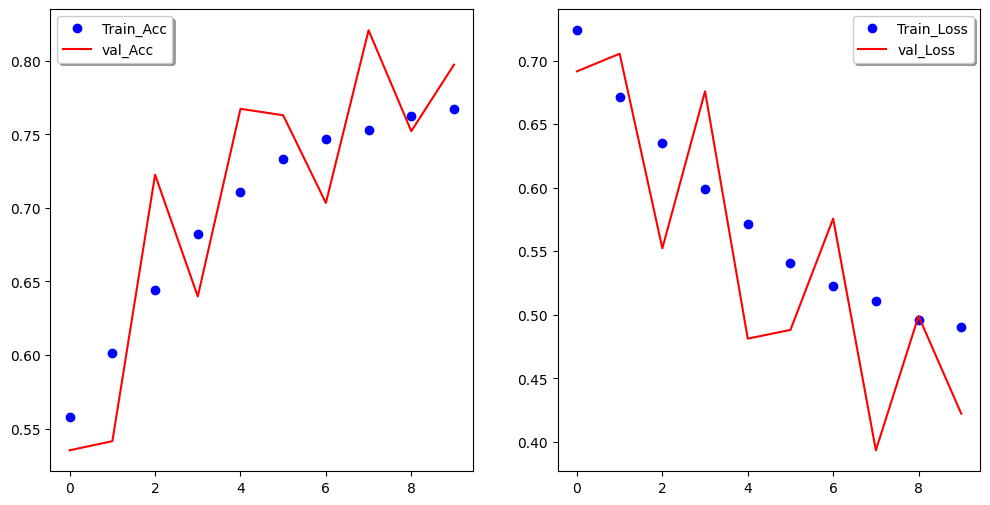

In [48]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'bo', label="Train_Acc")
plt.plot(epochs, val_accuracy, 'r', label="val_Acc")
plt.legend(loc='best', shadow=True)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label="Train_Loss")
plt.plot(epochs, val_loss, 'r', label="val_Loss")
plt.legend(loc='best', shadow=True)

plt.show()

In [49]:
test_file_names = os.listdir("/kaggle/working/test1")
test_df = pd.DataFrame({'file_name': test_file_names})

total_testing = test_df.shape[0]

In [50]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/kaggle/working/test1", 
    x_col='file_name',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [51]:
predictions = model.predict(test_generator)

834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step


In [53]:
test_df["CATEGORIES"] = np.argmax(predictions, axis=1)

In [54]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['CATEGORIES'] = test_df['CATEGORIES'].replace(label_map)

In [55]:
test_df['CATEGORIES'] = test_df['CATEGORIES'].replace({ 'dog': 1, 'cat': 0 })

/tmp/ipykernel_24/3126904015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['CATEGORIES'] = test_df['CATEGORIES'].replace({ 'dog': 1, 'cat': 0 })


<Axes: xlabel='CATEGORIES'>

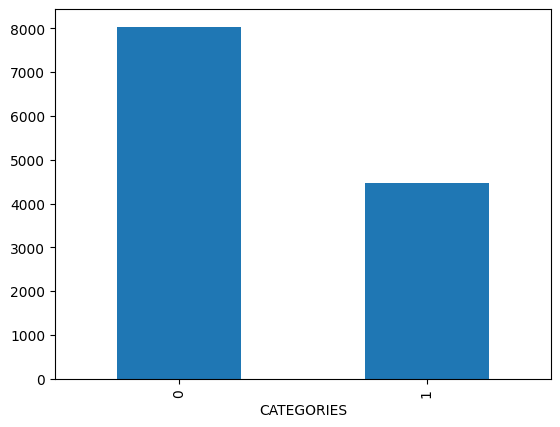

In [56]:
test_df["CATEGORIES"].value_counts().plot.bar()

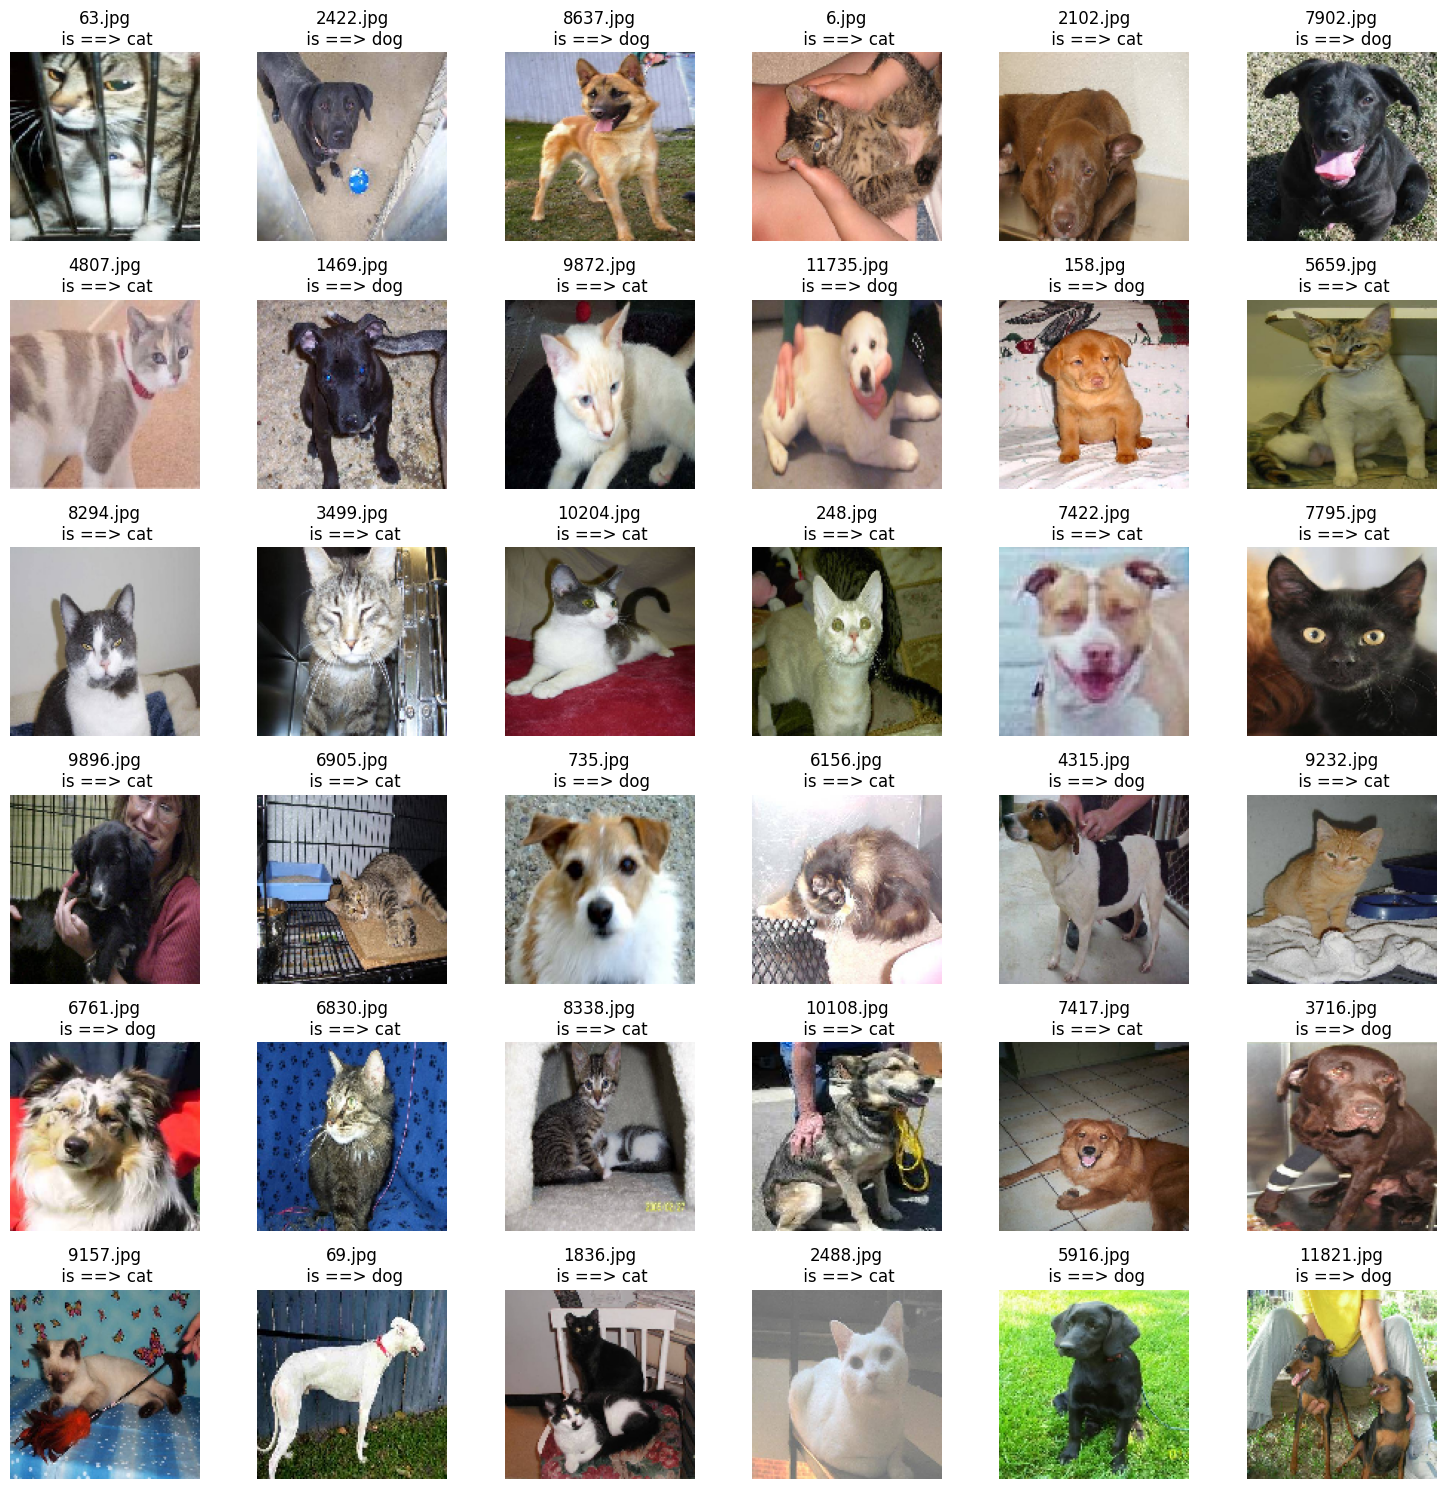

In [57]:
sample_test = test_df.head(36)

plt.figure(figsize=(15,15))

for index, row in sample_test.iterrows():
    file_name = row['file_name']
    category = row['CATEGORIES']
    path = os.path.join("/kaggle/working/test1", file_name)
    img = load_img(path, target_size=IMAGE_SIZE)
    plt.subplot(6,6,index+1)
    plt.imshow(img)
    plt.title(f"{file_name}\n is ==> {'cat' if category==0 else 'dog'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [60]:
model.save("CNN.h5")
model.save_weights("CNN.weights.h5")